In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set up Kaggle credentials
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json

In [ ]:
! kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 98% 145M/148M [00:01<00:00, 162MB/s]
100% 148M/148M [00:01<00:00, 127MB/s]


In [ ]:
# Unzip the dataset
!unzip cotton-disease-dataset.zip

Archive:  cotton-disease-dataset.zip
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (224)_iaip.jpg  
  inflat

In [ ]:
# Configure GPU options
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/train'
valid_path = '/content/Cotton Disease/train'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-21-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 45s 551ms/step - loss: 3.0014 - accuracy: 0.4275 - val_loss: 1.2059 - val_accuracy: 0.5189
Epoch 2/20
61/61 [==============================] - 31s 497ms/step - loss: 1.1007 - accuracy: 0.5705 - val_loss: 1.2111 - val_accuracy: 0.5849
Epoch 3/20
61/61 [==============================] - 32s 528ms/step - loss: 0.9958 - accuracy: 0.6166 - val_loss: 1.3386 - val_accuracy: 0.4245
Epoch 4/20
61/61 [==============================] - 32s 526ms/step - loss: 0.9755 - accuracy: 0.6110 - val_loss: 0.7931 - val_accuracy: 0.6792
Epoch 5/20
61/61 [==============================] - 32s 521ms/step - loss: 0.7915 - accuracy: 0.6940 - val_loss: 0.9262 - val_accuracy: 0.6792
Epoch 6/20
61/61 [==============================] - 32s 527ms/step - loss: 0.8454 - accuracy: 0.6591 - val_loss: 0.7950 - val_accuracy: 0.6415
Epoch 7/20
61/61 [==============================] - 32s 521ms/step - loss: 1.0019 - accuracy: 0.6453 - val_loss: 0.6536 - val_accuracy: 0.7358

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

NameError: ignored

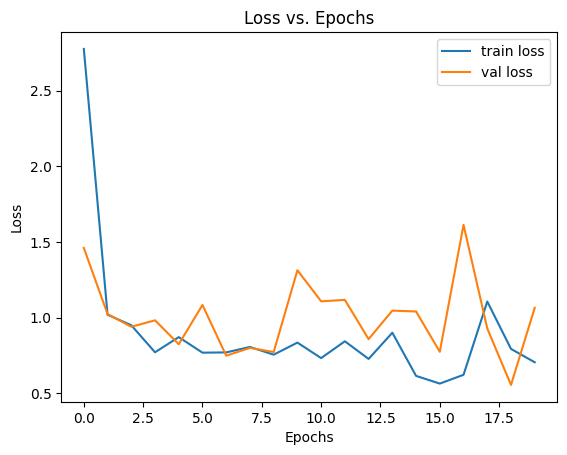

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

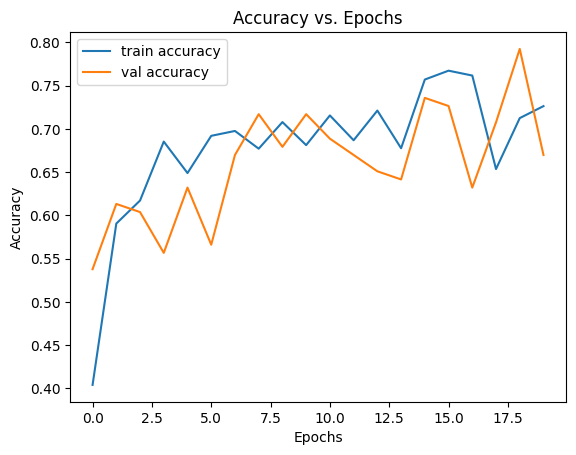

In [ ]:

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

4/4 [==============================] - 4s 936ms/step


In [ ]:
y_pred

array([[1.47593028e-07, 4.31496510e-03, 2.03244257e-04, 9.95481610e-01],
       [6.86099520e-04, 4.77674557e-03, 7.58833408e-01, 2.35703722e-01],
       [1.75896901e-04, 1.90586373e-01, 6.25522435e-02, 7.46685445e-01],
       [4.12748159e-06, 9.89829957e-01, 1.85394692e-05, 1.01473909e-02],
       [1.46736085e-04, 6.56571150e-01, 2.98567954e-03, 3.40296388e-01],
       [2.98340368e-04, 1.57926595e-04, 9.99315143e-01, 2.28623569e-04],
       [9.10506151e-06, 2.67945945e-01, 5.90094142e-02, 6.73035562e-01],
       [1.94935346e-04, 8.53812516e-01, 2.02527342e-04, 1.45790100e-01],
       [1.03102720e-04, 4.08480950e-02, 1.37367351e-02, 9.45312142e-01],
       [1.13936709e-04, 9.11859751e-01, 4.96125176e-05, 8.79767016e-02],
       [1.69297582e-05, 9.20494974e-01, 1.63385357e-05, 7.94717744e-02],
       [4.60204819e-06, 4.90154982e-01, 1.61852280e-04, 5.09678602e-01],
       [1.79569557e-04, 5.99839259e-03, 8.23232979e-02, 9.11498785e-01],
       [6.43658996e-06, 4.50012907e-02, 9.53395844e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred


array([3, 2, 3, 1, 1, 2, 3, 1, 3, 1, 1, 3, 3, 2, 2, 3, 1, 3, 3, 2, 3, 1,
       3, 1, 3, 2, 3, 1, 3, 1, 3, 2, 3, 1, 1, 1, 2, 0, 1, 0, 3, 3, 3, 2,
       1, 3, 0, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 0,
       3, 1, 0, 3, 3, 1, 3, 3, 1, 3, 3, 2, 2, 1, 1, 2, 1, 3, 2, 3, 1, 2,
       1, 0, 0, 2, 1, 3, 3, 0, 1, 3, 3, 1, 3, 3, 2, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename

In [ ]:
# Define a flask app
app = Flask(__name__)

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
def model_predict(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Rescale to [0, 1] as done during training

    # Make a prediction using the model
    prediction = model.predict(img)

    return prediction

In [ ]:
model=load_model('model_resnet50.h5')
image_path = '/content/Cotton Disease/test/diseased cotton plant/dd (188)_iaip.jpg'
result = model_predict(image_path, model)
print(result)

1/1 [==============================] - 1s 1s/step
[[4.1278836e-06 9.8982996e-01 1.8540866e-05 1.0147323e-02]]


In [ ]:
img=image.load_img('/content/Cotton Disease/test/diseased cotton leaf',target_size=(224,224))

IsADirectoryError: ignored

In [ ]:
x=image.img_to_array(img)
x

NameError: ignored

In [ ]:
x.shape

TensorShape([None, 100352])

In [ ]:
x=x/255


In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


TypeError: ignored

In [ ]:
model.predict(img_data)

NameError: ignored

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

NameError: ignored

In [ ]:
a==1

NameError: ignored

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__